In [ ]:
"""
INIT:connect to keithley
- has to be run before anything else
- the 'keithley' variable represents the device
- use keithley.write(), keithley.query(), etc to interact
"""

import pyvisa
from time import sleep
from matplotlib import pyplot as plt
import numpy as np
import keithley
import file_io
import measure

keithley = keithley.init_keithley()
keithley.write("format.data = format.ASCII")
print(keithley.query("*IDN?"))

In [ ]:
measure.measure_count(keithley, count=100, interval=0.05, beep_done=True)

In [3]:
keithley.write("format.data = format.DREAL\nformat.byteorder = format.LITTLEENDIAN")


67

Task exception was never retrieved
future: <Task finished name='Task-5' coro=<_ServiceBrowserBase._async_start_query_sender() done, defined at /usr/lib/python3.10/site-packages/zeroconf/_services/browser.py:442> exception=NotRunningException()>
Traceback (most recent call last):
  File "/usr/lib/python3.10/site-packages/zeroconf/_services/browser.py", line 445, in _async_start_query_sender
    await self.zc.async_wait_for_start()
  File "/usr/lib/python3.10/site-packages/zeroconf/_core.py", line 507, in async_wait_for_start
    raise NotRunningException
zeroconf._exceptions.NotRunningException


In [11]:
print(keithley.query(f"print(smua.nvbuffer1.n)"))
keithley.write("format.data = format.ASCII")
buffer = keithley.query_ascii_values(f"printbuffer(1, smua.nvbuffer1.n, smua.nvbuffer1.timestamps)") #, datatype='d', container=np.array)
print(buffer)

0.000000e+00, 5.000000e-02, 1.000000e-01, 1.500000e-01, 2.000000e-01, 2.500000e-01, 3.000000e-01, 3.500000e-01, 4.000000e-01, 4.500000e-01, 5.000000e-01, 5.500000e-01, 6.000000e-01, 6.500000e-01, 7.000000e-01, 7.500000e-01, 8.000000e-01, 8.500000e-01, 9.000000e-01, 9.500000e-01, 1.000000e+00, 1.050000e+00, 1.100000e+00, 1.150000e+00, 1.200000e+00, 1.250000e+00, 1.300000e+00, 1.350000e+00, 1.400000e+00, 1.450000e+00, 1.500000e+00, 1.550000e+00, 1.600000e+00, 1.690891e+00, 1.710923e+00, 1.750000e+00, 1.800000e+00, 1.850000e+00, 1.900000e+00, 1.950000e+00, 2.000000e+00, 2.050000e+00, 2.100000e+00, 2.150000e+00, 2.200000e+00, 2.250000e+00, 2.300000e+00, 2.350000e+00, 2.420332e+00, 2.450000e+00, 2.500000e+00, 2.550000e+00, 2.600000e+00, 2.650000e+00, 2.700000e+00, 2.750000e+00, 2.820553e+00, 2.890843e+00, 2.910875e+00, 2.950000e+00, 3.000000e+00, 3.050000e+00, 3.100000e+00, 3.150000e+00, 3.200000e+00, 3.250000e+00, 3.300000e+00, 3.350000e+00, 3.400000e+00, 3.450000e+00, 3.500000e+00, 3.5500

In [14]:
buffer1 = measure.collect_buffer(keithley, buffer_nr=1)
buffer2 = measure.collect_buffer(keithley, buffer_nr=2)

readings: [ 4.974127e-10 -1.418591e-12 -1.573563e-12 -1.728535e-12 -1.704693e-12
 -1.847744e-12 -1.931190e-12 -1.788139e-12 -1.871586e-12 -2.169609e-12
 -2.074242e-12 -1.895428e-12 -1.895428e-12 -1.776218e-12 -1.990795e-12
 -1.788139e-12 -1.811981e-12 -1.657009e-12 -1.573563e-12 -2.396107e-12
 -2.515316e-12 -2.765656e-12 -2.825260e-12 -3.147125e-12 -2.300739e-12
 -2.825260e-12 -3.278255e-12 -5.257130e-12 -6.818771e-12 -8.916855e-12
 -7.712841e-12  6.437302e-12 -1.142025e-11 -1.206398e-11 -4.649043e-10
 -3.427613e-09 -2.460408e-09 -2.340376e-09 -1.306653e-10  1.496077e-11
  2.933741e-11  1.953280e-09  8.579970e-10  9.226799e-12 -1.095533e-11
 -2.508163e-11 -2.776039e-09 -8.686423e-09  4.935264e-12  1.246929e-11
  3.225744e-09  2.814472e-09  1.877034e-09  2.229273e-09  1.713574e-09
  8.355618e-10 -4.332781e-10  5.896091e-11  5.762577e-11  8.129537e-09
  4.044378e-09  1.771629e-09  7.849216e-10  4.098892e-10  3.390551e-10
  2.956390e-10  3.033876e-10  1.716256e-10  1.463890e-11 -5.078316e

In [15]:
print(buffer1)

[[ 0.000000e+00  4.974127e-10]
 [ 5.000000e-02 -1.418591e-12]
 [ 1.000000e-01 -1.573563e-12]
 [ 1.500000e-01 -1.728535e-12]
 [ 2.000000e-01 -1.704693e-12]
 [ 2.500000e-01 -1.847744e-12]
 [ 3.000000e-01 -1.931190e-12]
 [ 3.500000e-01 -1.788139e-12]
 [ 4.000000e-01 -1.871586e-12]
 [ 4.500000e-01 -2.169609e-12]
 [ 5.000000e-01 -2.074242e-12]
 [ 5.500000e-01 -1.895428e-12]
 [ 6.000000e-01 -1.895428e-12]
 [ 6.500000e-01 -1.776218e-12]
 [ 7.000000e-01 -1.990795e-12]
 [ 7.500000e-01 -1.788139e-12]
 [ 8.000000e-01 -1.811981e-12]
 [ 8.500000e-01 -1.657009e-12]
 [ 9.000000e-01 -1.573563e-12]
 [ 9.500000e-01 -2.396107e-12]
 [ 1.000000e+00 -2.515316e-12]
 [ 1.050000e+00 -2.765656e-12]
 [ 1.100000e+00 -2.825260e-12]
 [ 1.150000e+00 -3.147125e-12]
 [ 1.200000e+00 -2.300739e-12]
 [ 1.250000e+00 -2.825260e-12]
 [ 1.300000e+00 -3.278255e-12]
 [ 1.350000e+00 -5.257130e-12]
 [ 1.400000e+00 -6.818771e-12]
 [ 1.450000e+00 -8.916855e-12]
 [ 1.500000e+00 -7.712841e-12]
 [ 1.550000e+00  6.437302e-12]
 [ 1.600

In [ ]:


plt.plot(buffer1)
plt.plot(buffer2)

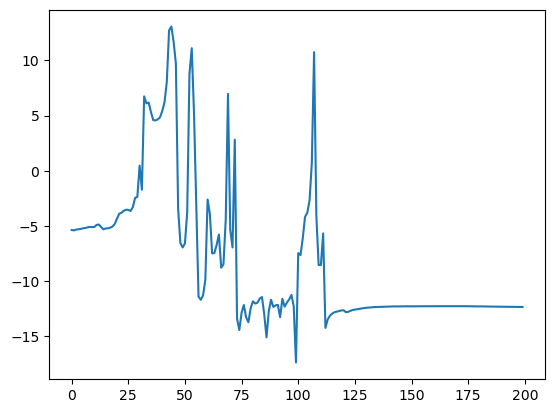

38

In [17]:
from IPython.display import clear_output

smua_settings = """
display.clear() 
display.settext('starting')
smua.reset()
smua.measure.autorangev = smua.AUTORANGE_ON
smua.source.output = smua.OUTPUT_OFF
-- max 20 V expected
smua.measure.rangev = 20
"""
measure.run_lua(keithley, "smua_reset.lua")
keithley.write("smua.source.output = smua.OUTPUT_ON")
data = []
for i in range(200):
    data.append(tuple(float(v) for v in keithley.query("print(smua.measure.v())").strip('\n').split('\t')))
    # print(i, data[-1])
    clear_output(wait=True)
    plt.plot(data)
    plt.show()
    sleep(0.05)

keithley.write("smua.source.output = smua.OUTPUT_OFF")

In [13]:
keithley.read_raw()

VisaIOError: VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.

In [ ]:
measure.run_lua(keithley, "buffer_reset.lua")
measure.run_lua(keithley, "smua_reset.lua")
keithley.write("smua.measure.count = 100")
keithley.write("smua.measure.interval = 0.05")

In [ ]:
 keithley.write("smua.measure.iv(smua.nvbuffer1, smua.nvbuffer2)")


In [ ]:
keithley.write("format.data = format.DREAL\nformat.byteorder = format.LITTLEENDIAN")

In [ ]:
keithley.query_binary_values("printbuffer(1, smua.nvbuffer1.n, smua.nvbuffer1)", container=)